# Market Features Overview

This section explores key market features used in our analysis, including market breadth indicators, technical signals, and sector mappings. For detailed definitions, see [docs/market_features.md](../docs/market_features.md).

**Features include:**
- Advance-Decline Line
- New Highs and New Lows
- Percentage Above Moving Averages (MA20, MA50)
- RSI (Bullish, Oversold, Overbought)
- MACD Bullish
- Sector Mapping

In [119]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load market breadth data
market_breadth = pd.read_parquet('../data/market_features/daily_breadth.parquet')
market_breadth.tail()

,adv_dec_line,new_highs,new_lows,above_ma20,above_ma50,rsi_bullish,rsi_oversold,rsi_overbought,macd_bullish
Date,,,,,,,,,
2025-05-29,0,21,28,31.411531,25.248509,66.003976,0.397614,3.976143,71.769384
2025-05-30,-4,20,28,31.610338,24.850895,66.600398,0.596421,4.174950,71.769384
2025-06-02,-2,20,28,31.809145,25.049702,64.214712,0.596421,5.566600,71.570577
2025-06-03,2,20,29,31.809145,25.248509,70.377734,0.397614,6.958250,71.371769
2025-06-04,4,20,29,31.809145,25.248509,73.161034,0.596421,6.958250,72.166998


## Data Summary

Below we display the structure and a sample of the market breadth data, including the date range and missing values.

In [120]:
print("Market Breadth Info:")
print(market_breadth.info())
print(market_breadth.tail())
print(f"\nDate range: {market_breadth.index.min()} to {market_breadth.index.max()}")
print(f"\nAny NaNs per column:\n{market_breadth.isna().sum()}")

Market Breadth Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2020-06-04 to 2025-06-04
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   adv_dec_line    1257 non-null   int64  
 1   new_highs       1257 non-null   int64  
 2   new_lows        1257 non-null   int64  
 3   above_ma20      1257 non-null   float64
 4   above_ma50      1257 non-null   float64
 5   rsi_bullish     1257 non-null   float64
 6   rsi_oversold    1257 non-null   float64
 7   rsi_overbought  1257 non-null   float64
 8   macd_bullish    1257 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 98.2 KB
None
            adv_dec_line  new_highs  new_lows  above_ma20  above_ma50  \
Date                                                                    
2025-05-29             0         21        28   31.411531   25.248509   
2025-05-30            -4         20        28   31.610338   24.850895   
2025-06-02  

## Visualizing Market Breadth Indicators

We plot several key indicators to visualize market conditions over time.

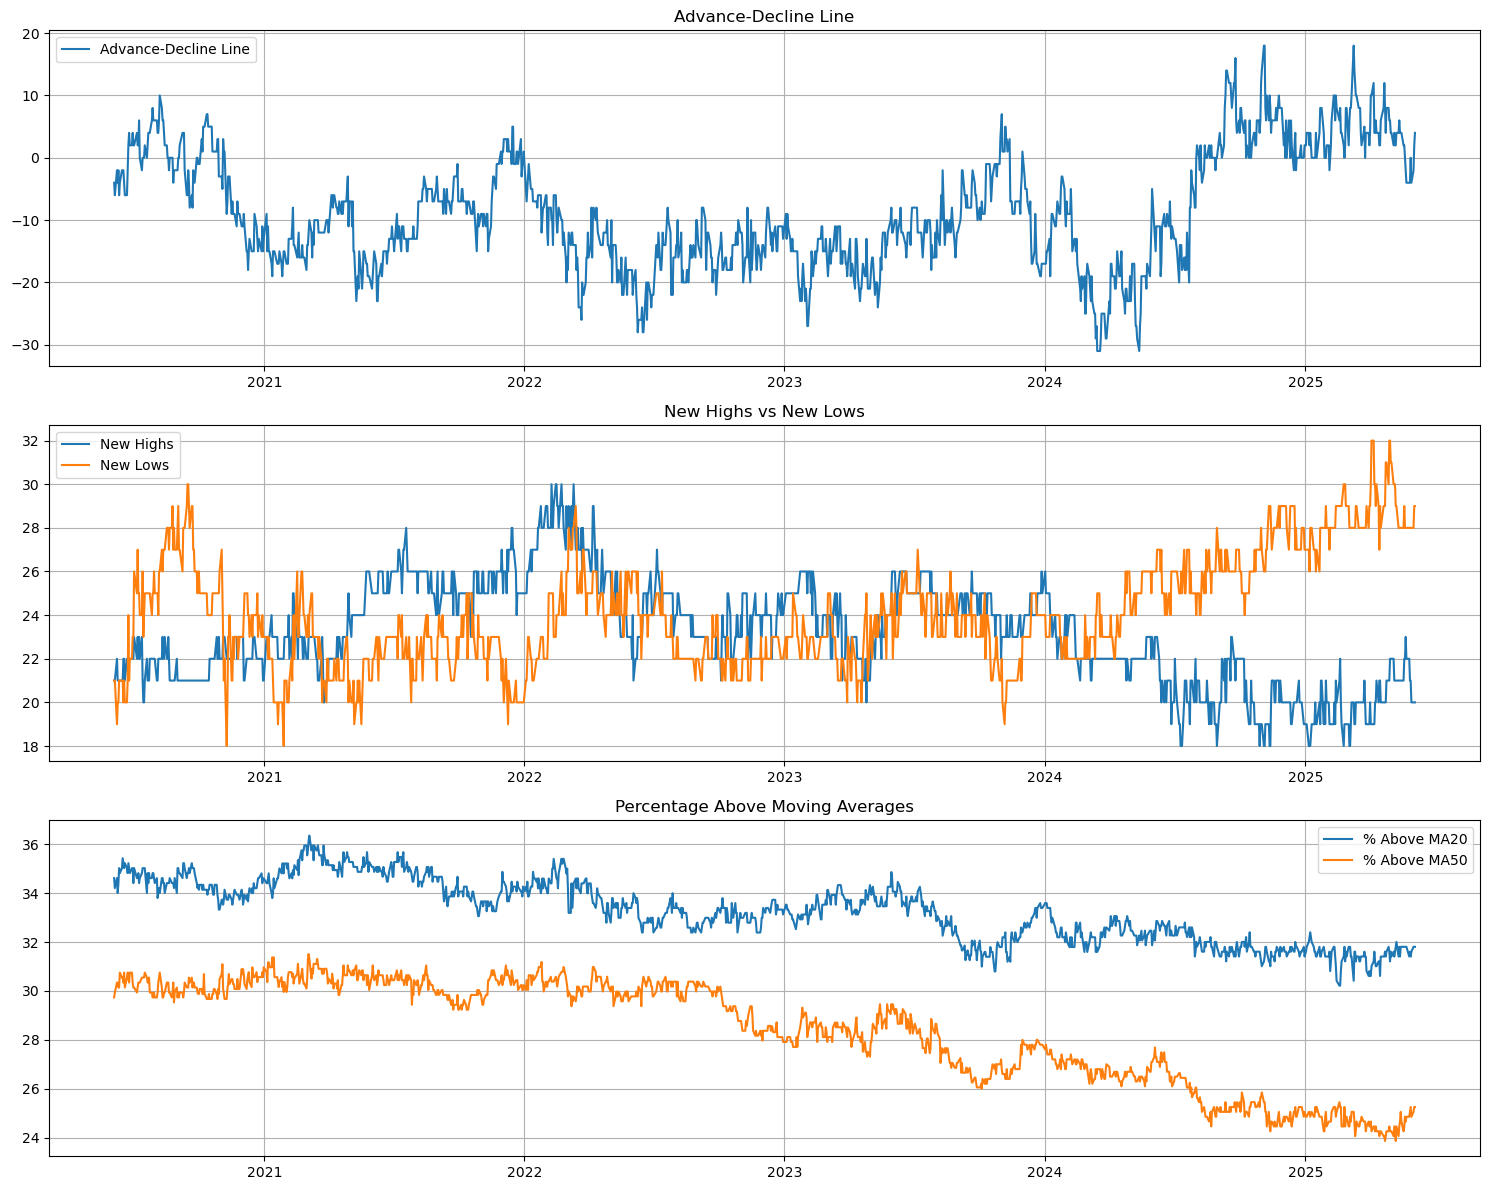

In [121]:
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# Advance-Decline Line
axes[0].plot(market_breadth.index, market_breadth['adv_dec_line'], label='Advance-Decline Line')
axes[0].set_title('Advance-Decline Line')
axes[0].legend()
axes[0].grid(True)

# New Highs and Lows
axes[1].plot(market_breadth.index, market_breadth['new_highs'], label='New Highs')
axes[1].plot(market_breadth.index, market_breadth['new_lows'], label='New Lows')
axes[1].set_title('New Highs vs New Lows')
axes[1].legend()
axes[1].grid(True)

# Percentage Above Moving Averages
axes[2].plot(market_breadth.index, market_breadth['above_ma20'], label='% Above MA20')
axes[2].plot(market_breadth.index, market_breadth['above_ma50'], label='% Above MA50')
axes[2].set_title('Percentage Above Moving Averages')
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
plt.show()

## Technical Indicators

We also examine technical signals such as RSI and MACD bullishness.

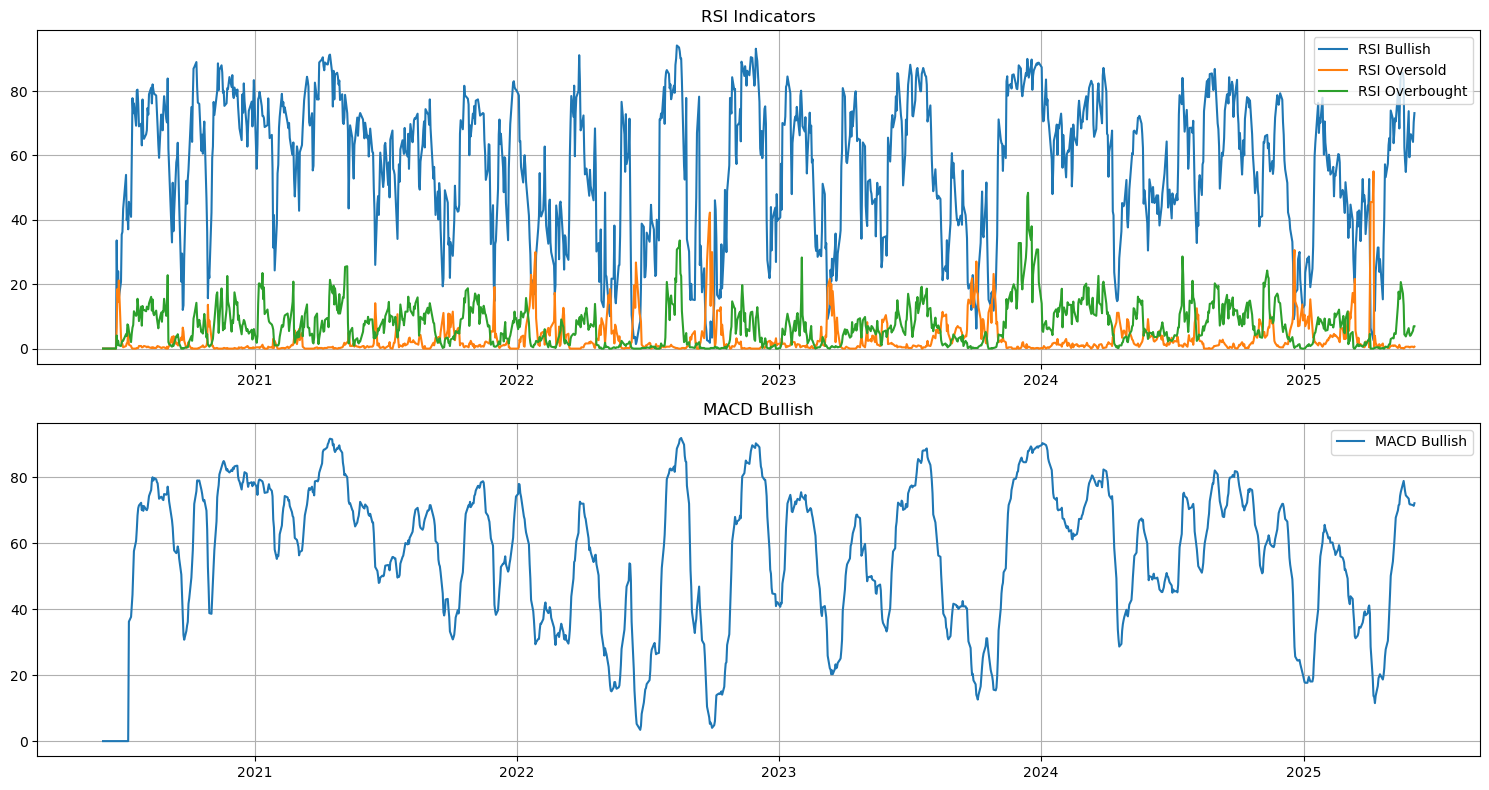

In [122]:
fig, axes = plt.subplots(2, 1, figsize=(15, 8))

# RSI indicators
axes[0].plot(market_breadth.index, market_breadth['rsi_bullish'], label='RSI Bullish')
axes[0].plot(market_breadth.index, market_breadth['rsi_oversold'], label='RSI Oversold')
axes[0].plot(market_breadth.index, market_breadth['rsi_overbought'], label='RSI Overbought')
axes[0].set_title('RSI Indicators')
axes[0].legend()
axes[0].grid(True)

# MACD Bullish
axes[1].plot(market_breadth.index, market_breadth['macd_bullish'], label='MACD Bullish')
axes[1].set_title('MACD Bullish')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

## Correlation Analysis

The following heatmap shows the correlation between different market features.

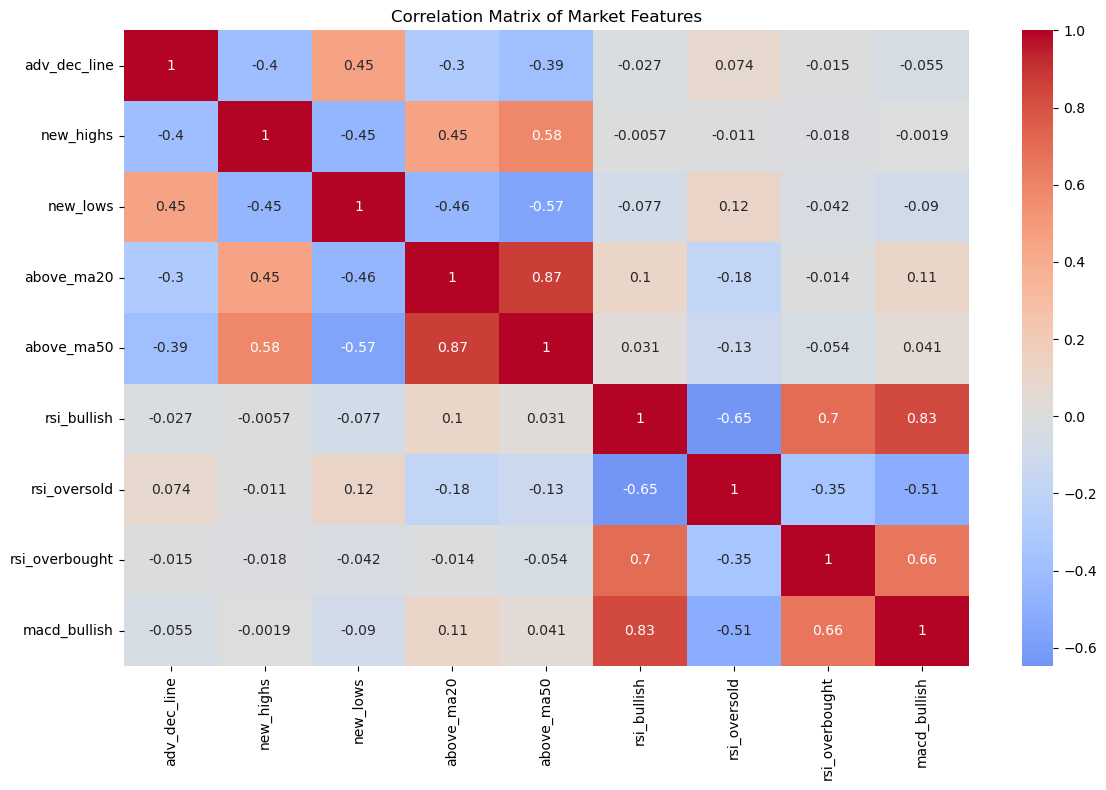

In [123]:
correlation_matrix = market_breadth.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Market Features')
plt.tight_layout()
plt.show()

## Summary Statistics

We compute summary statistics for all market features to understand their distributions.

In [124]:
summary_stats = market_breadth.describe()
display(summary_stats)

,adv_dec_line,new_highs,new_lows,above_ma20,above_ma50,rsi_bullish,rsi_oversold,rsi_overbought,macd_bullish
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000
mean,-8.731106,23.159905,24.020684,33.293850,28.392259,56.205476,3.062728,7.068305,56.383887
std,9.153900,2.330027,2.455246,1.250846,2.104505,22.095756,5.265325,6.465826,22.102561
min,-31.000000,18.000000,18.000000,30.218688,23.856859,0.000000,0.000000,0.000000,0.000000
25%,-15.000000,22.000000,22.000000,32.264529,26.693227,41.153082,0.400802,1.810865,40.442656
50%,-10.000000,23.000000,24.000000,33.400000,29.058116,60.563380,1.195219,5.633803,60.563380
75%,-1.000000,25.000000,25.000000,34.274194,30.241935,73.279352,3.386454,10.800000,73.600000
max,18.000000,30.000000,32.000000,36.363636,31.515152,94.164990,55.069583,48.400000,91.951710


## Sector Mapping

Sector mapping links each ticker to its sector and subsector. For more, see [docs/market_features.md](../docs/market_features.md).

In [125]:
with open('../data/market_features/sector_mapping.json', 'r') as f:
    sector_dict = json.load(f)

sector_mapping = pd.DataFrame(list(sector_dict.items()), columns=['ticker', 'sector'])
display(sector_mapping.tail())
print(f"\n{sector_mapping['sector'].nunique()} distinct sectors:\n{sector_mapping['sector'].unique()}")

,ticker,sector
498,IBM,Technology
499,MLM,Basic Materials
500,GPN,Industrials
501,MCHP,Technology
502,POOL,Industrials



11 distinct sectors:
['Industrials' 'Financial Services' 'Utilities' 'Energy' 'Real Estate'
 'Consumer Cyclical' 'Healthcare' 'Technology' 'Basic Materials'
 'Consumer Defensive' 'Communication Services']


## Sector Performance Analysis

This section analyzes sector-level performance metrics including price, volatility, returns, and momentum indicators. The data is available in both individual sector files and a combined wide-format table.

Sector Performance Data Info:

UTILITIES Sector:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2020-06-04 to 2025-06-04
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         1257 non-null   float64
 1   volatility    1257 non-null   float64
 2   volume        1257 non-null   int64  
 3   returns_1d    1256 non-null   float64
 4   returns_5d    1252 non-null   float64
 5   returns_20d   1237 non-null   float64
 6   momentum_5d   1252 non-null   float64
 7   momentum_20d  1237 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 88.4 KB
None

Sample data:
                price  volatility     volume  returns_1d  returns_5d  \
Date                                                                   
2025-05-29  87.976652   56.354858  105914200    0.003763    0.003934   
2025-05-30  88.758161   56.840269  216098900    0.008883    0.020595   
2025-06-02  89.180323   58.137642  1143

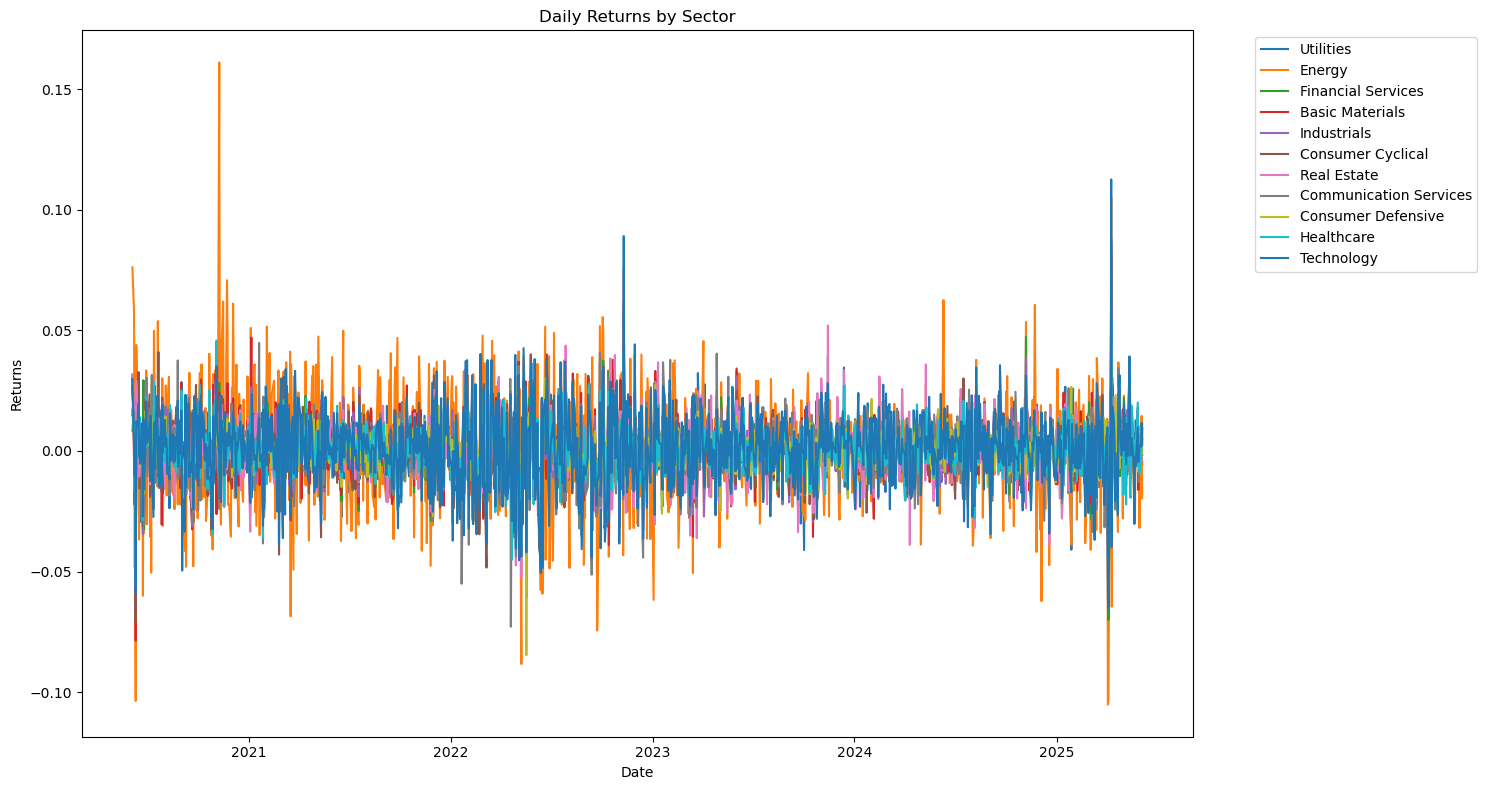

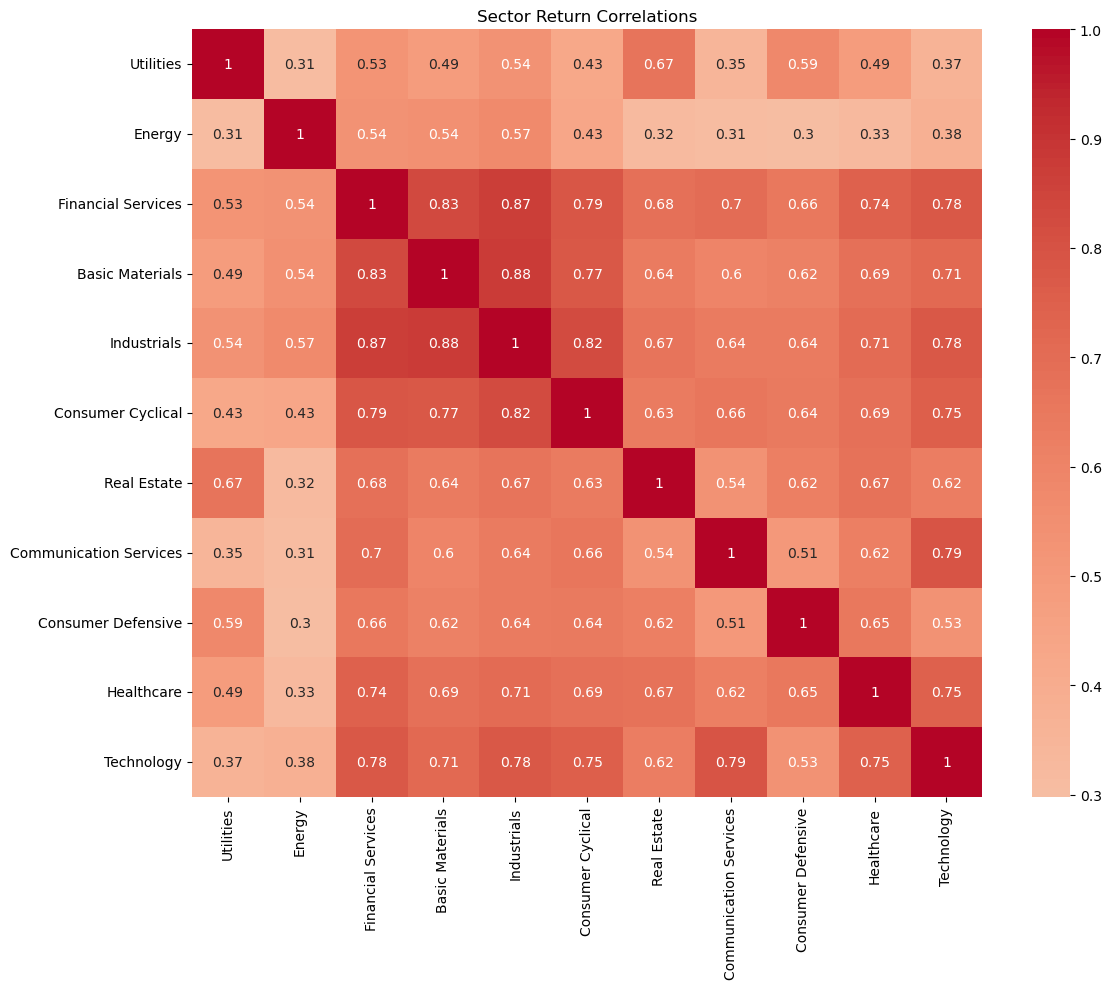

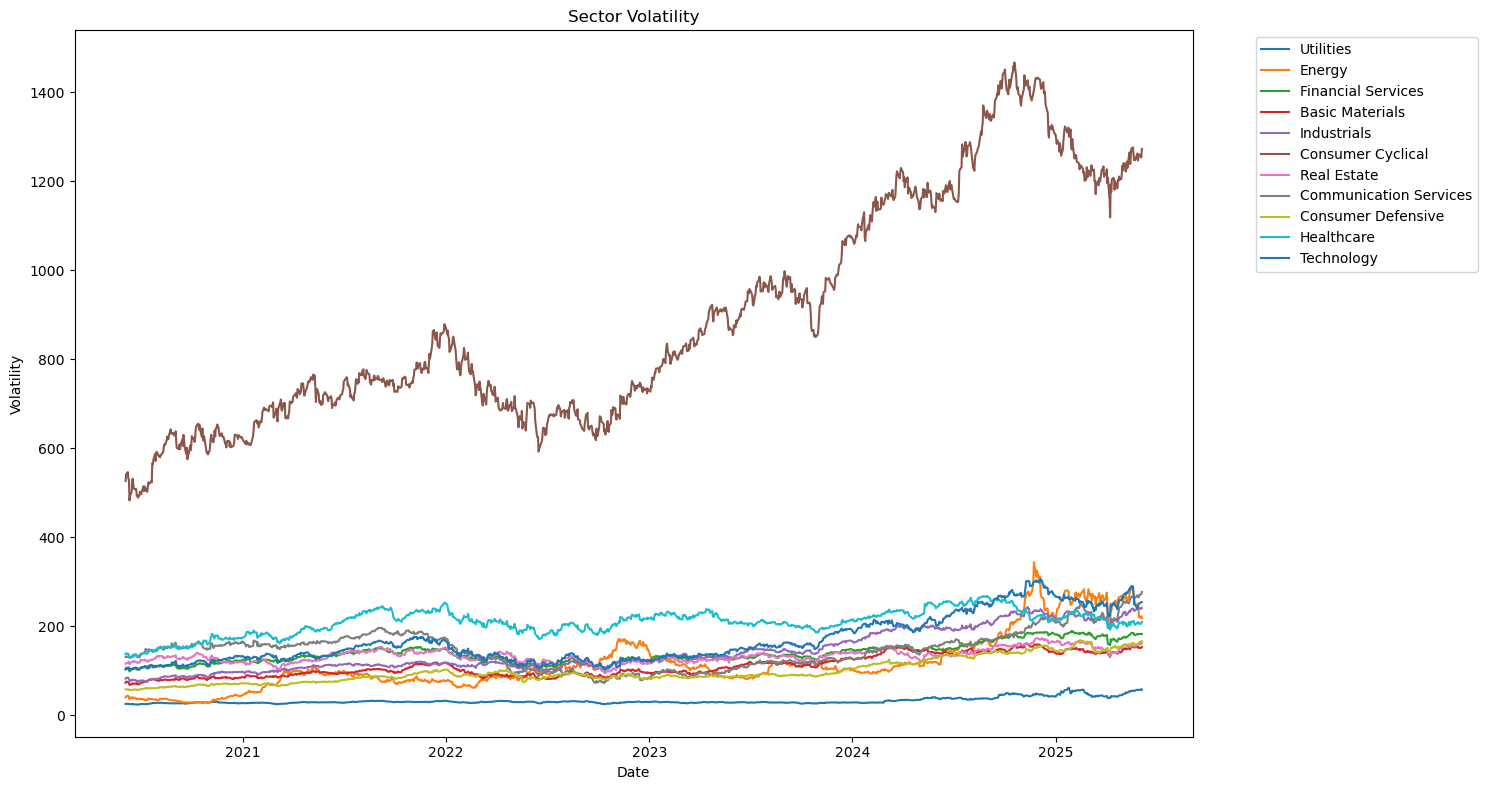

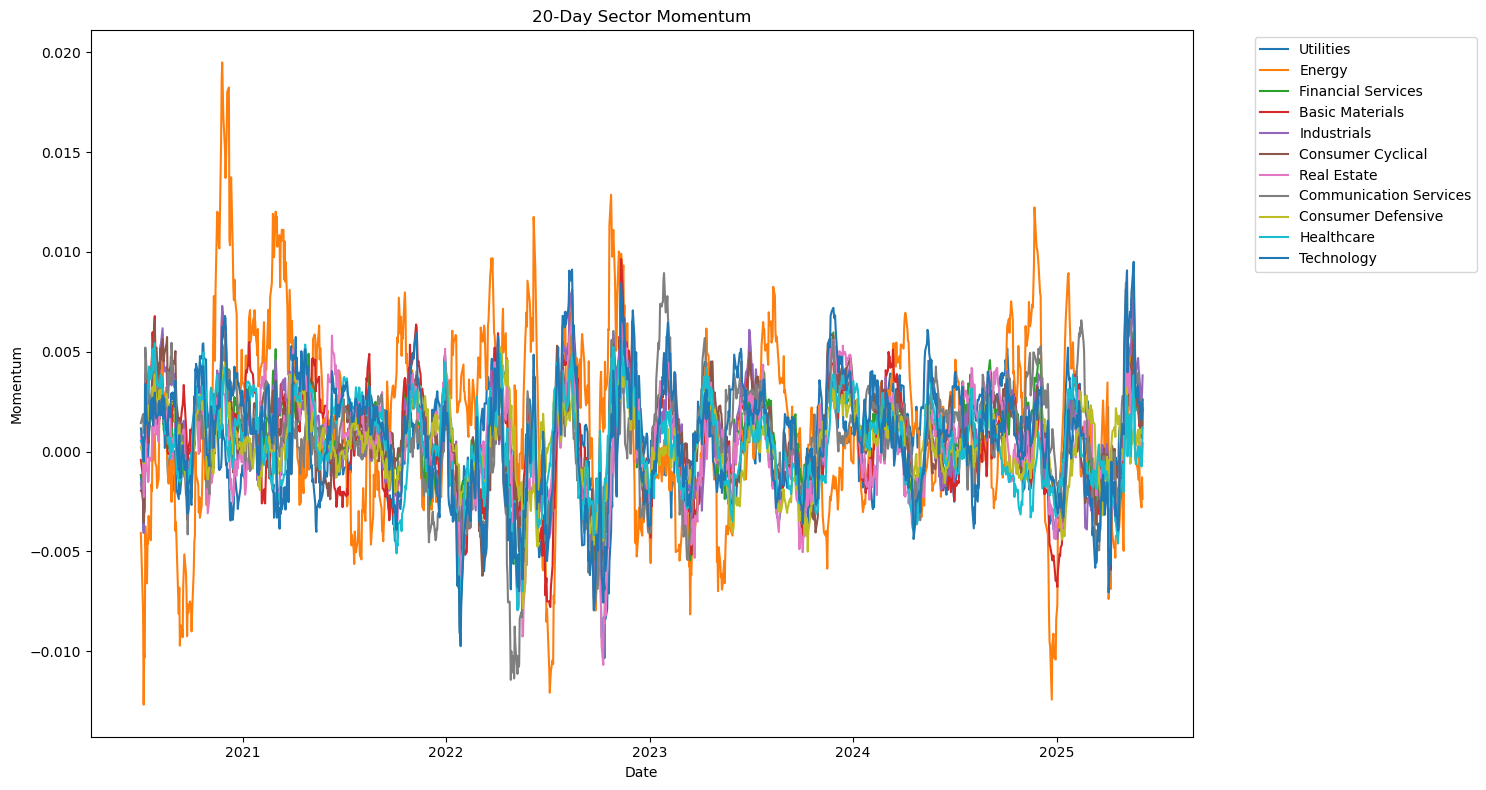


Volatility Statistics by Sector:
                              mean         std          max         min
Utilities                32.360223    7.131573    61.485416   23.921285
Energy                  116.373610   63.836287   344.243718   27.786770
Financial Services      138.087004   22.061613   189.054815   98.471172
Basic Materials         110.327986   24.415895   160.558128   68.074112
Industrials             142.050298   46.313775   242.976304   74.819126
Consumer Cyclical       891.841263  253.724273  1467.302884  482.709137
Real Estate             133.990140   14.526817   173.308476   94.725052
Communication Services  147.198302   41.985582   277.097867   72.449087
Consumer Defensive       98.531040   27.787147   169.146749   56.491995
Healthcare              208.391445   28.066352   268.037336  128.999517
Technology              166.845407   52.747882   305.938536  102.015261


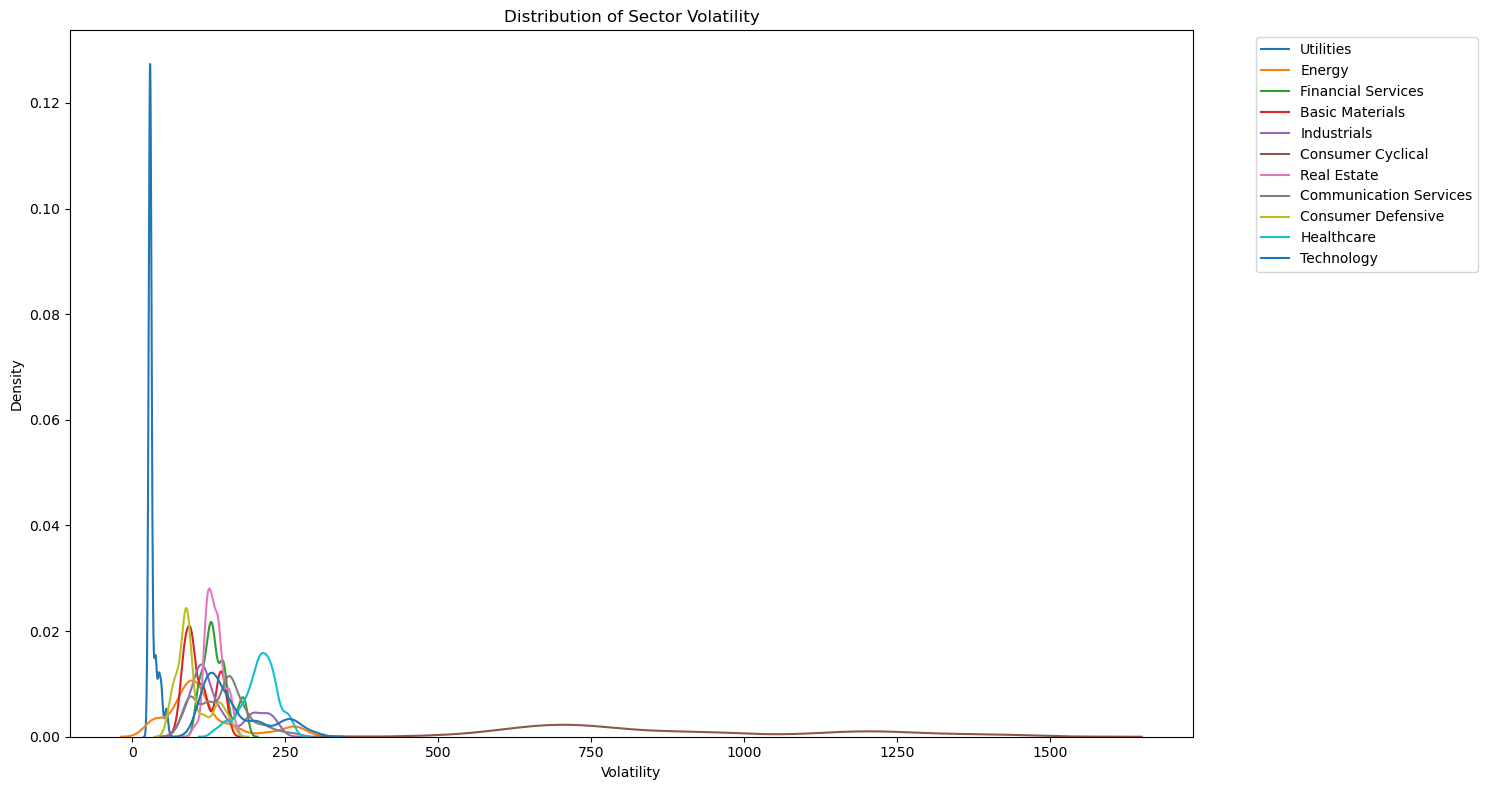

In [126]:
# Load sector performance data
import glob
import os

# Get list of all sector parquet files
sector_files = glob.glob('../data/market_features/sectors/*.parquet')

# Create a dictionary to store sector dataframes
sector_data = {}
for file in sector_files:
    sector_name = os.path.basename(file).replace('.parquet', '')
    sector_data[sector_name] = pd.read_parquet(file)

# Display basic information for each sector
print("Sector Performance Data Info:")
for sector, df in sector_data.items():
    print(f"\n{sector.upper()} Sector:")
    print(df.info())
    print("\nSample data:")
    print(df.tail())

# Create a visualization of sector returns
plt.figure(figsize=(15, 8))
for sector, df in sector_data.items():
    if 'returns_1d' in df.columns:
        plt.plot(df.index, df['returns_1d'], label=sector)
plt.title('Daily Returns by Sector')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Calculate sector correlations
# First, create a combined dataframe of returns
returns_data = pd.DataFrame()
for sector, df in sector_data.items():
    if 'returns_1d' in df.columns:
        returns_data[sector] = df['returns_1d']

# Calculate and plot correlation matrix
correlation_matrix = returns_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Sector Return Correlations')
plt.tight_layout()
plt.show()

# Additional sector analysis
# Plot sector volatility
plt.figure(figsize=(15, 8))
for sector, df in sector_data.items():
    if 'volatility' in df.columns:
        plt.plot(df.index, df['volatility'], label=sector)
plt.title('Sector Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot sector momentum
plt.figure(figsize=(15, 8))
for sector, df in sector_data.items():
    if 'momentum_20d' in df.columns:
        plt.plot(df.index, df['momentum_20d'], label=sector)
plt.title('20-Day Sector Momentum')
plt.xlabel('Date')
plt.ylabel('Momentum')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Add this to your sector analysis section
# Calculate and compare volatility statistics
volatility_stats = {}
for sector, df in sector_data.items():
    if 'volatility' in df.columns:
        volatility_stats[sector] = {
            'mean': df['volatility'].mean(),
            'std': df['volatility'].std(),
            'max': df['volatility'].max(),
            'min': df['volatility'].min()
        }

# Create a comparison DataFrame
volatility_comparison = pd.DataFrame(volatility_stats).T
print("\nVolatility Statistics by Sector:")
print(volatility_comparison)

# Plot volatility distributions
plt.figure(figsize=(15, 8))
for sector, df in sector_data.items():
    if 'volatility' in df.columns:
        sns.kdeplot(data=df['volatility'], label=sector)
plt.title('Distribution of Sector Volatility')
plt.xlabel('Volatility')
plt.ylabel('Density')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Market Sentiment Analysis

This section explores market sentiment derived from GDELT news data, including sentiment moving averages, momentum, and volatility measures.

Market Sentiment Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1824 entries, 2020-06-04 to 2025-06-03
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sentiment_ma5         1820 non-null   float64
 1   sentiment_ma20        1805 non-null   float64
 2   sentiment_momentum    1819 non-null   float64
 3   sentiment_volatility  1805 non-null   float64
 4   sentiment_zscore      1805 non-null   float64
dtypes: float64(5)
memory usage: 85.5 KB
None

Sample of sentiment data:
            sentiment_ma5  sentiment_ma20  sentiment_momentum  \
date                                                            
2025-05-30      -1.749857       -1.801547            0.219486   
2025-05-31      -1.773445       -1.813758           -0.117940   
2025-06-01      -1.869246       -1.833203           -0.479006   
2025-06-02      -1.911797       -1.847534           -0.212753   
2025-06-03      -1.954439   

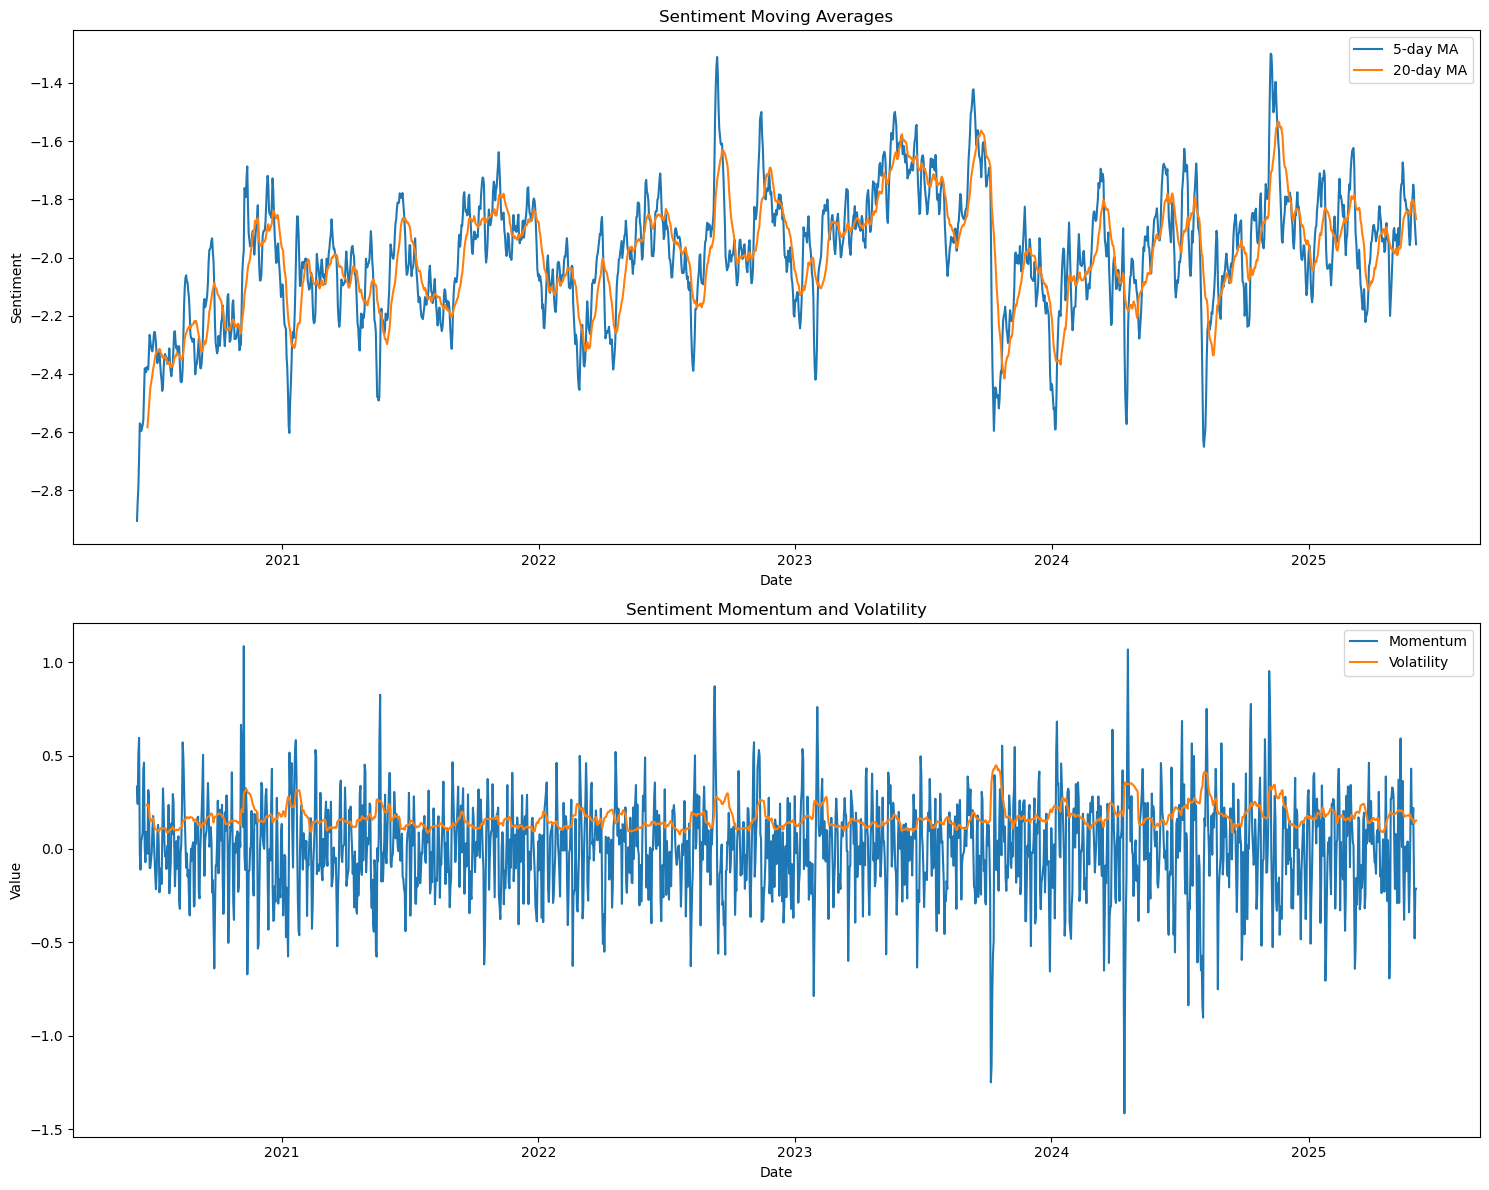

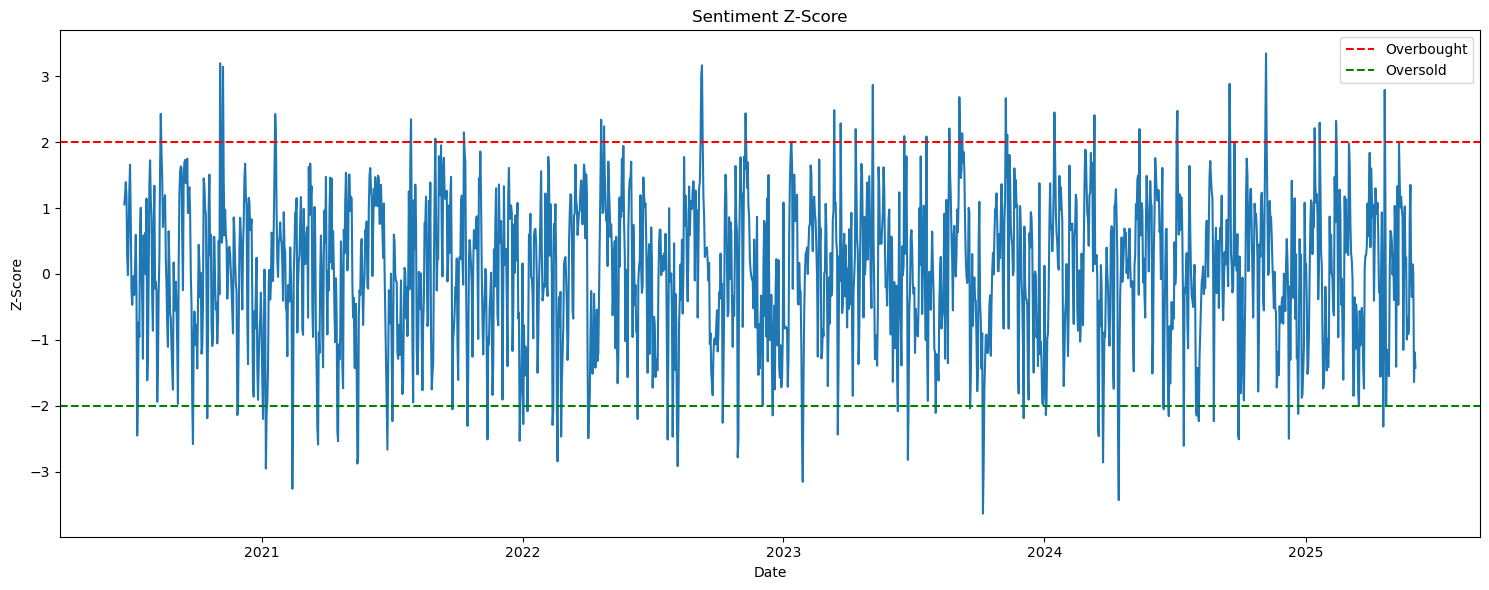

In [117]:
# Load market sentiment data
sentiment_data = pd.read_parquet('../data/market_features/market_sentiment.parquet')

# Display basic information
print("Market Sentiment Data Info:")
print(sentiment_data.info())
print("\nSample of sentiment data:")
print(sentiment_data.tail())

# Create sentiment visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Plot sentiment moving averages
ax1.plot(sentiment_data.index, sentiment_data['sentiment_ma5'], label='5-day MA')
ax1.plot(sentiment_data.index, sentiment_data['sentiment_ma20'], label='20-day MA')
ax1.set_title('Sentiment Moving Averages')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment')
ax1.legend()

# Plot sentiment momentum and volatility
ax2.plot(sentiment_data.index, sentiment_data['sentiment_momentum'], label='Momentum')
ax2.plot(sentiment_data.index, sentiment_data['sentiment_volatility'], label='Volatility')
ax2.set_title('Sentiment Momentum and Volatility')
ax2.set_xlabel('Date')
ax2.set_ylabel('Value')
ax2.legend()

plt.tight_layout()
plt.show()

# Plot sentiment z-score
plt.figure(figsize=(15, 6))
plt.plot(sentiment_data.index, sentiment_data['sentiment_zscore'])
plt.axhline(y=2, color='r', linestyle='--', label='Overbought')
plt.axhline(y=-2, color='g', linestyle='--', label='Oversold')
plt.title('Sentiment Z-Score')
plt.xlabel('Date')
plt.ylabel('Z-Score')
plt.legend()
plt.tight_layout()
plt.show()

## Market Volatility Analysis

This section examines various volatility indicators including VIX metrics, market-wide volatility measures, and cross-sectional volatility statistics.

Market Volatility Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1256 entries, 2020-06-04 to 2025-06-03
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vix                  1256 non-null   float64
 1   market_volatility    1236 non-null   float64
 2   cross_sectional_vol  1256 non-null   float64
 3   vix_ma20             1237 non-null   float64
 4   vix_std20            1237 non-null   float64
 5   vol_of_vol           1217 non-null   float64
dtypes: float64(6)
memory usage: 68.7 KB
None

Sample of volatility data:
                  vix  market_volatility  cross_sectional_vol  vix_ma20  \
Date                                                                      
2025-05-28  19.309999           0.170499           108.562888   20.8275   
2025-05-29  19.180000           0.170452           107.880419   20.5515   
2025-05-30  18.570000           0.170342           108.653780   20.2500  

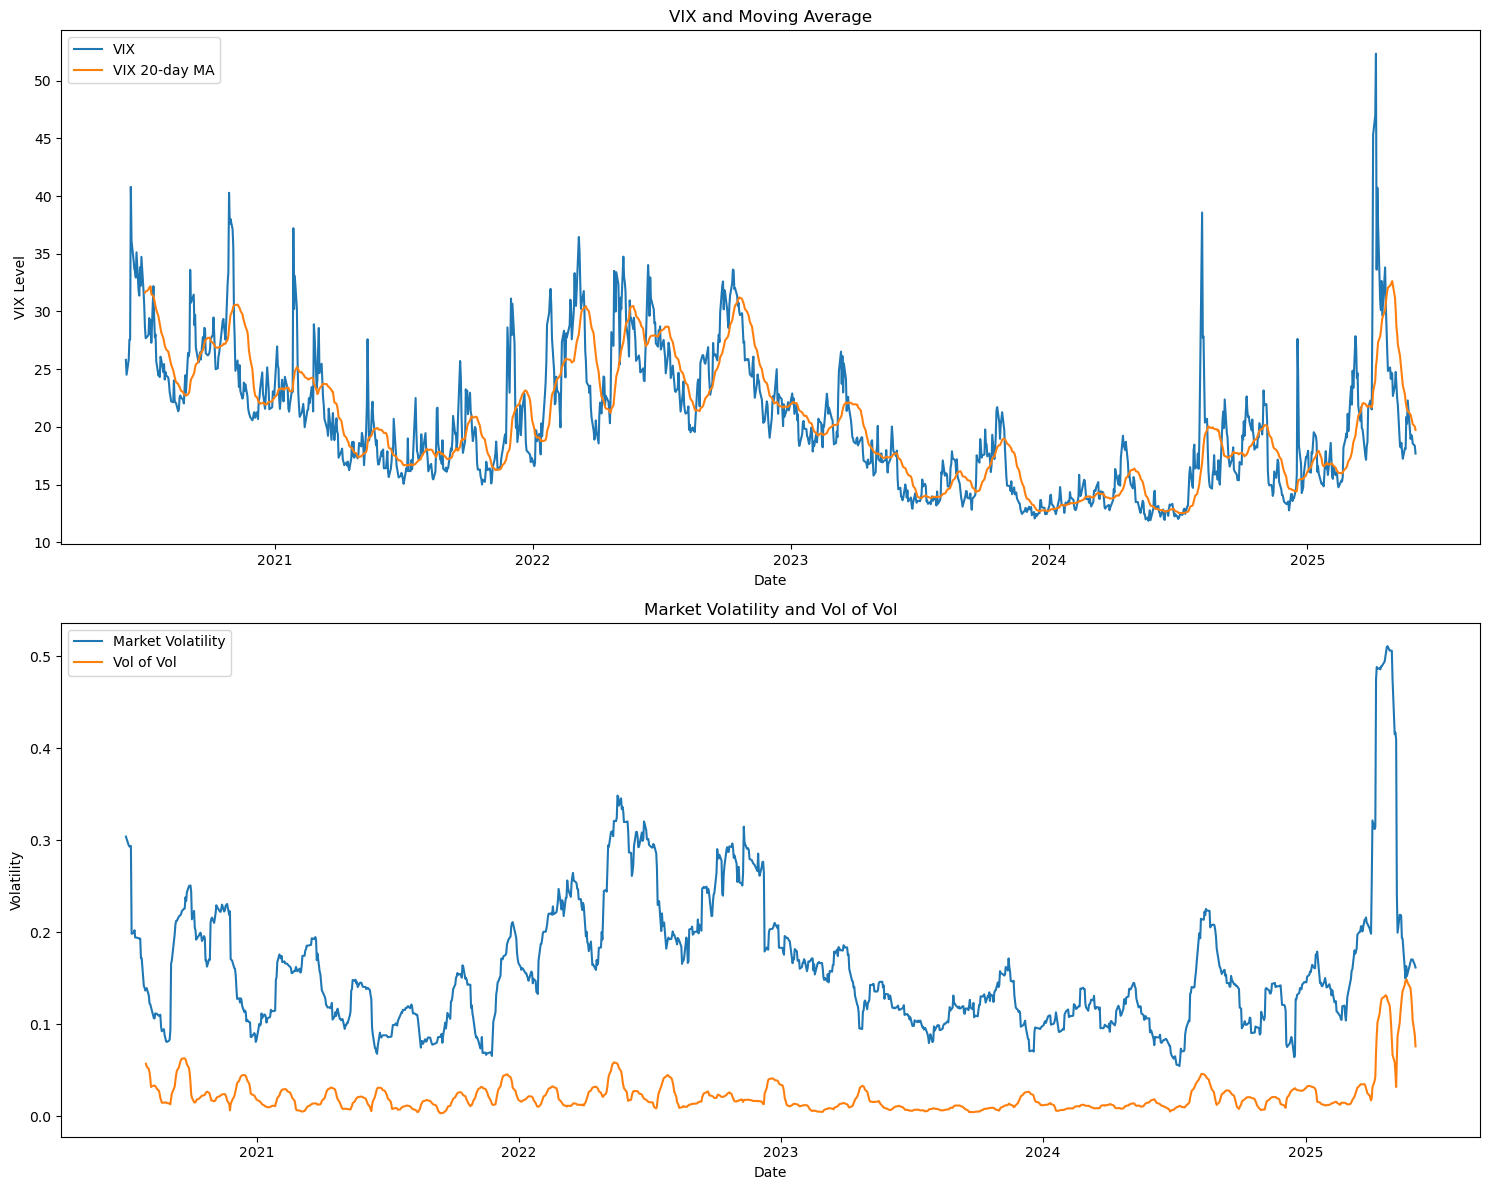

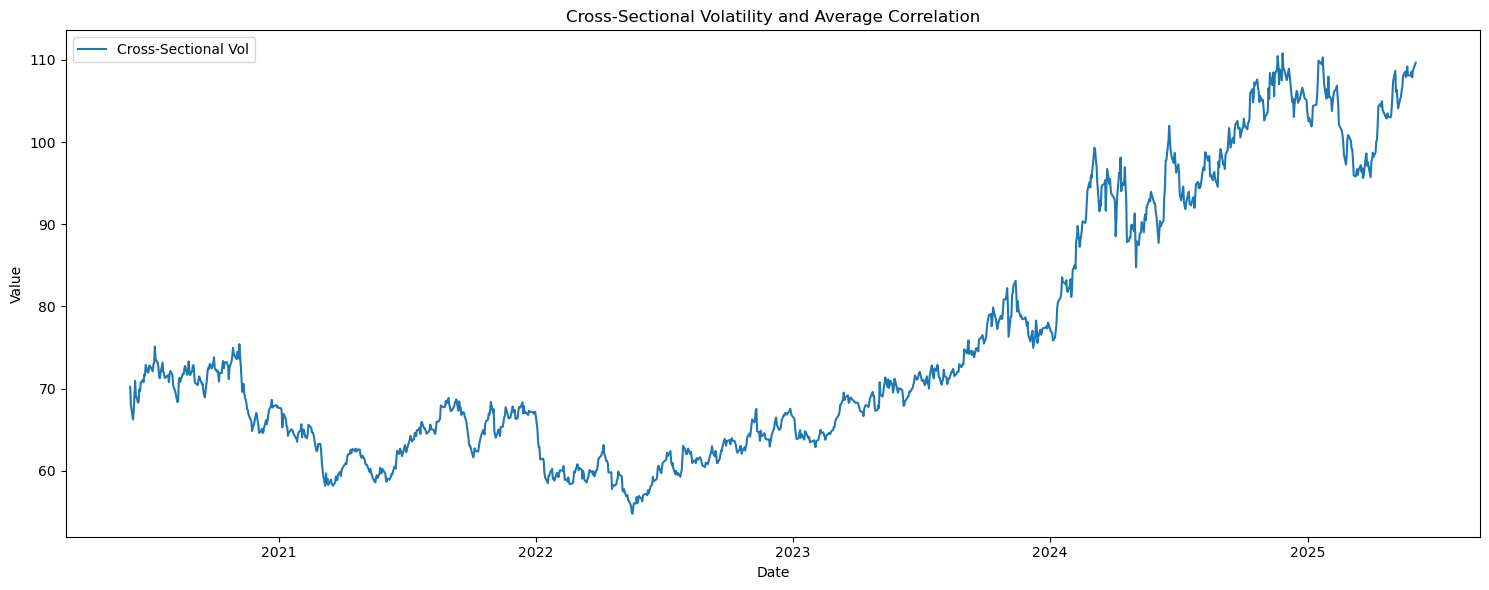

In [130]:
# Load market volatility data
volatility_data = pd.read_parquet('../data/market_features/market_volatility.parquet')

# Display basic information
print("Market Volatility Data Info:")
print(volatility_data.info())
print("\nSample of volatility data:")
print(volatility_data.tail())

# Create volatility visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Plot VIX and its moving average
ax1.plot(volatility_data.index, volatility_data['vix'], label='VIX')
ax1.plot(volatility_data.index, volatility_data['vix_ma20'], label='VIX 20-day MA')
ax1.set_title('VIX and Moving Average')
ax1.set_xlabel('Date')
ax1.set_ylabel('VIX Level')
ax1.legend()

# Plot market volatility and vol of vol
ax2.plot(volatility_data.index, volatility_data['market_volatility'], label='Market Volatility')
ax2.plot(volatility_data.index, volatility_data['vol_of_vol'], label='Vol of Vol')
ax2.set_title('Market Volatility and Vol of Vol')
ax2.set_xlabel('Date')
ax2.set_ylabel('Volatility')
ax2.legend()

plt.tight_layout()
plt.show()

# Plot cross-sectional measures
plt.figure(figsize=(15, 6))
plt.plot(volatility_data.index, volatility_data['cross_sectional_vol'], label='Cross-Sectional Vol')
plt.title('Cross-Sectional Volatility and Average Correlation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()

In [129]:
# import pandas as pd
# from pathlib import Path

# # Load the volatility DataFrame
# volatility_path = Path("../data/market_features/market_volatility.parquet")
# df = pd.read_parquet(volatility_path)

# # Delete the last three rows
# df = df.iloc[:-3]

# # Fill the last row with NaNs
# # df.iloc[-1] = pd.NA

# # Resave the DataFrame
# df.to_parquet(volatility_path)

# print("Volatility DataFrame updated and saved.")

Volatility DataFrame updated and saved.
